# Clothes Size Predictor 🧥

## EDA Process

In [1]:
# --- Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- Import the CSV file
data = pd.read_csv('../data/processed/clothes_processed.csv')

In [3]:
# --- Info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  26351 non-null  int64  
 1   age     26351 non-null  float64
 2   height  26351 non-null  float64
 3   size    26351 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 823.6+ KB
None


In [4]:
# --- First 5 rows
print(data.head())

   weight   age  height size
0      62  28.0  172.72   XL
1      59  36.0  167.64    L
2      61  34.0  165.10    M
3      65  27.0  175.26    L
4      62  45.0  172.72    M


## Analyze the Target

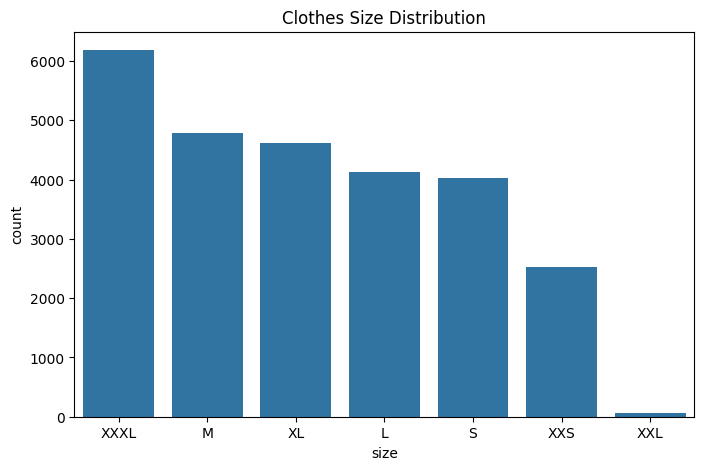

In [5]:
plt.figure(figsize=(8, 5))
# Clothes Size Distribution
sns.countplot(x='size', data=data, order=data['size'].value_counts().index)
plt.title('Clothes Size Distribution')
plt.show()

## Outliers and Numeric Features Distribution

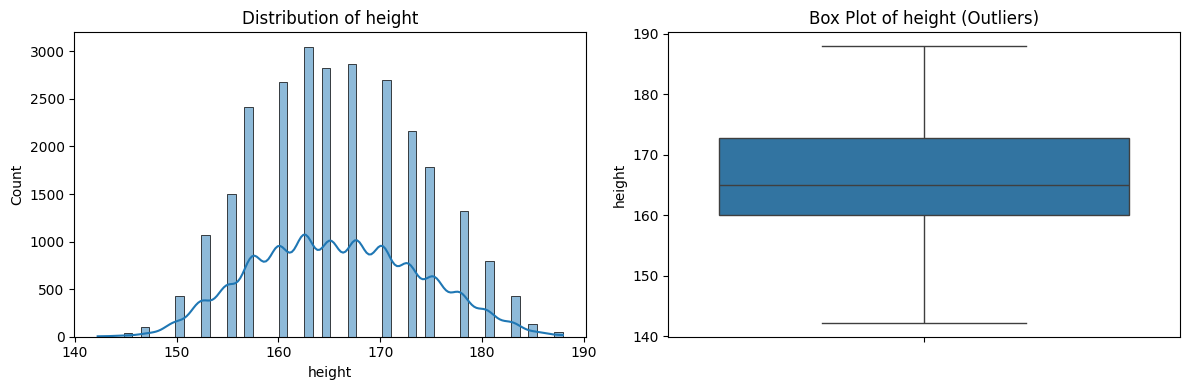

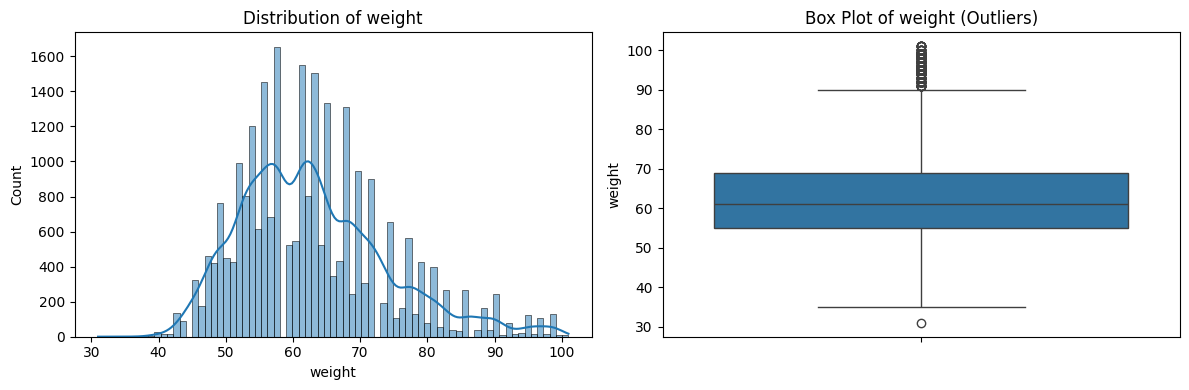

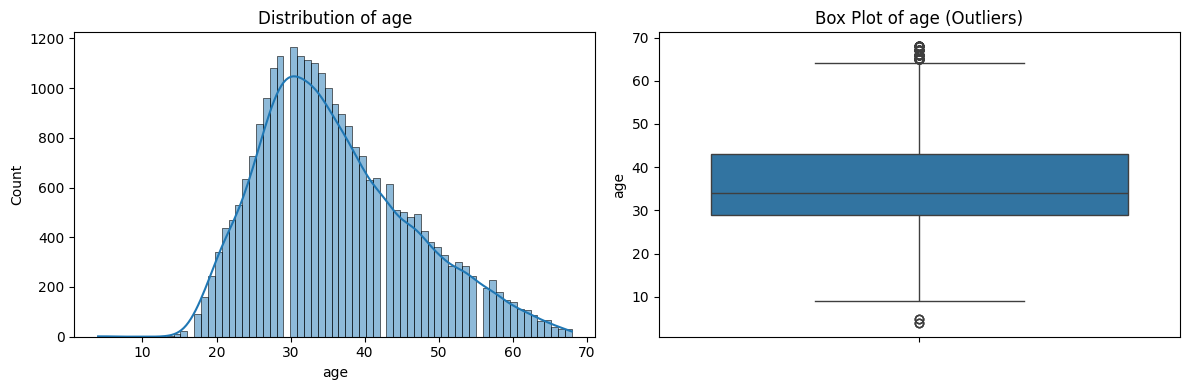

In [6]:
numeric_features = ['height', 'weight', 'age']

# Histograms and Box Plots
for feature in numeric_features:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram to see the overall distribution
    sns.histplot(data[feature], kde=True, ax=ax[0])
    ax[0].set_title(f'Distribution of {feature}')

    # Box Plot to visualize outliers
    sns.boxplot(y=data[feature], ax=ax[1])
    ax[1].set_title(f'Box Plot of {feature} (Outliers)')
    
    plt.tight_layout()
    plt.show()

# Ejemplo de limpieza (SI encuentras outliers ridículos, ej: Edad=1)
# df = df[df['Edad'] > 5]

## Features and Target Relation

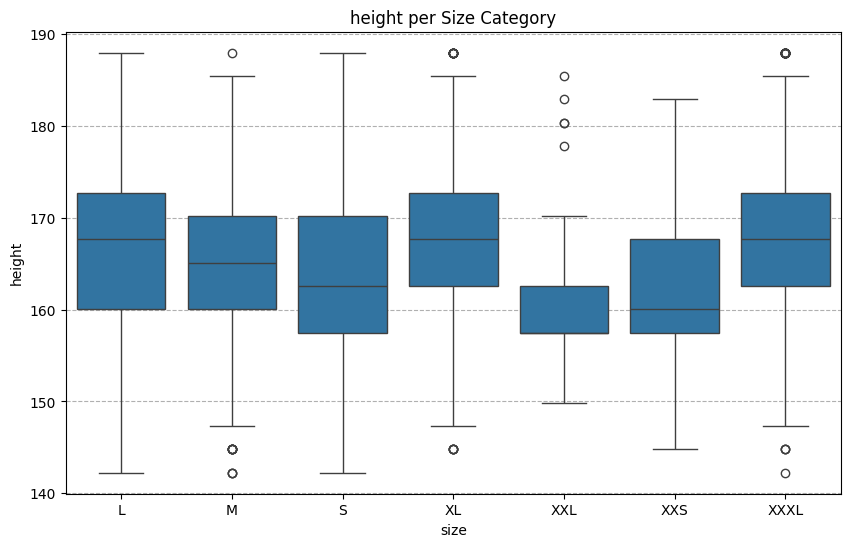

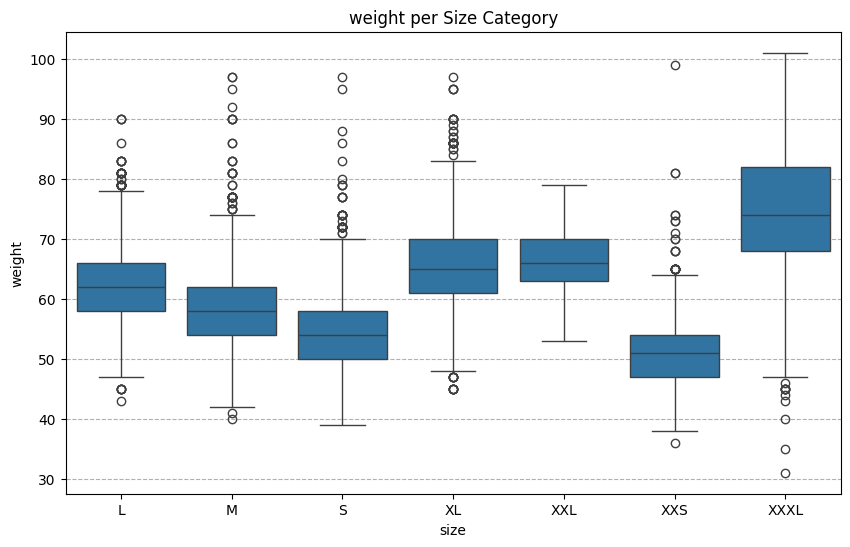

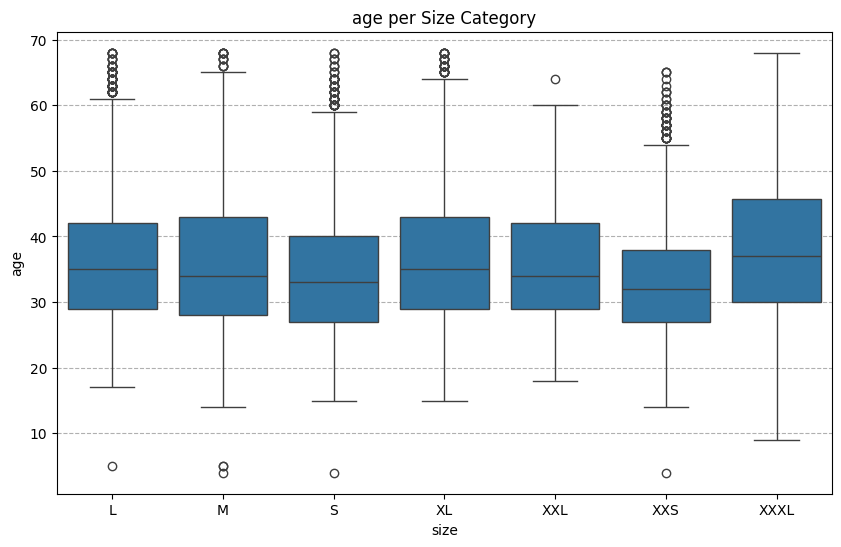

In [7]:
# Gráfico de Caja (Box Plot) para ver la variación de la feature por talla
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    # -> 'order' ensures that sizes are displayed in logical order (if possible)
    sns.boxplot(x='size', y=feature, data=data, order=sorted(data['size'].unique())) 
    plt.title(f'{feature} per Size Category')
    plt.grid(axis='y', linestyle='--')
    plt.show()